<a href="https://colab.research.google.com/github/RosieNguyen98/A-B-testing-for-game-analysis/blob/main/A_B_testing_for_game_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Câu hỏi: Liệu có sự khác biệt nào về mặt thống kê giữa số lượng người chơi gate_30 và gate_40, giữa tỷ lệ chuyển đổi ngày 1 và ngày 7 không?

1.Import data

In [ ]:

# Load data
from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Python sample/ML/Game/cookie_cats.csv'
df = pd.read_csv(file_path)
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


2.Understanding data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [ ]:
df.describe()

,userid,sum_gamerounds
count,9.018900e+04,90189.000000
mean,4.998412e+06,51.872457
std,2.883286e+06,195.050858
min,1.160000e+02,0.000000
25%,2.512230e+06,5.000000
50%,4.995815e+06,16.000000
75%,7.496452e+06,51.000000
max,9.999861e+06,49854.000000


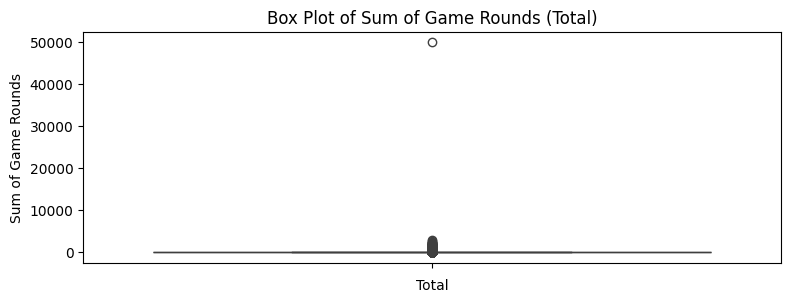

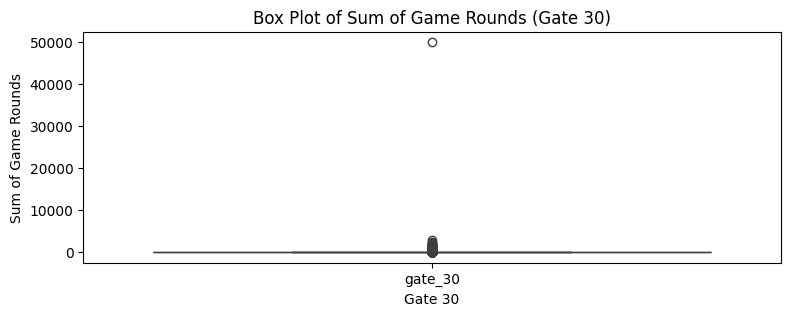

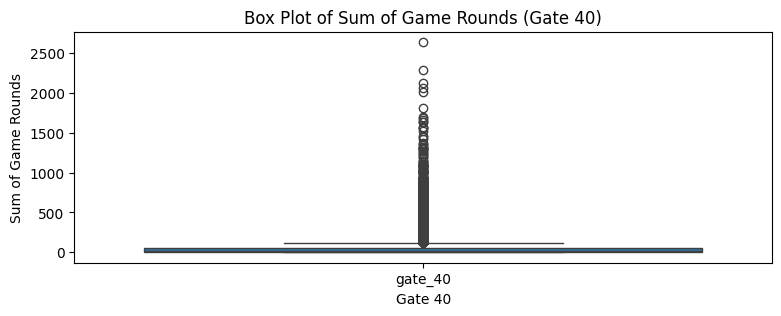

In [ ]:
# So sánh số lượng game rounds giữa các version
# Vẽ biểu đồ hộp cho tổng thể
plt.figure(figsize=(9, 3))
sns.boxplot(y='sum_gamerounds', data=df)
plt.title('Box Plot of Sum of Game Rounds (Total)')
plt.xlabel('Total')
plt.ylabel('Sum of Game Rounds')
plt.show()

# Vẽ biểu đồ hộp cho gate_30
plt.figure(figsize=(9, 3))
sns.boxplot(x='version', y='sum_gamerounds', data=df[df['version'] == 'gate_30'])
plt.title('Box Plot of Sum of Game Rounds (Gate 30)')
plt.xlabel('Gate 30')
plt.ylabel('Sum of Game Rounds')
plt.show()

# Vẽ biểu đồ hộp cho gate_40
plt.figure(figsize=(9, 3))
sns.boxplot(x='version', y='sum_gamerounds', data=df[df['version'] == 'gate_40'])
plt.title('Box Plot of Sum of Game Rounds (Gate 40)')
plt.xlabel('Gate 40')
plt.ylabel('Sum of Game Rounds')
plt.show()

In [ ]:
# Tính trung bình cho gate_30
mean_retention_1_gate_30 = df[df['version'] == 'gate_30']['retention_1'].mean()
mean_retention_7_gate_30 = df[df['version'] == 'gate_30']['retention_7'].mean()

# Tính trung bình cho gate_40
mean_retention_1_gate_40 = df[df['version'] == 'gate_40']['retention_1'].mean()
mean_retention_7_gate_40 = df[df['version'] == 'gate_40']['retention_7'].mean()

print(f"Mean Retention 1 for gate_30: {mean_retention_1_gate_30:.2f}")
print(f"Mean Retention 1 for gate_40: {mean_retention_1_gate_40:.2f}")
print(f"Mean Retention 7 for gate_30: {mean_retention_7_gate_30:.2f}")
print(f"Mean Retention 7 for gate_40: {mean_retention_7_gate_40:.2f}")


Mean Retention 1 for gate_30: 0.45
Mean Retention 1 for gate_40: 0.44
Mean Retention 7 for gate_30: 0.19
Mean Retention 7 for gate_40: 0.18


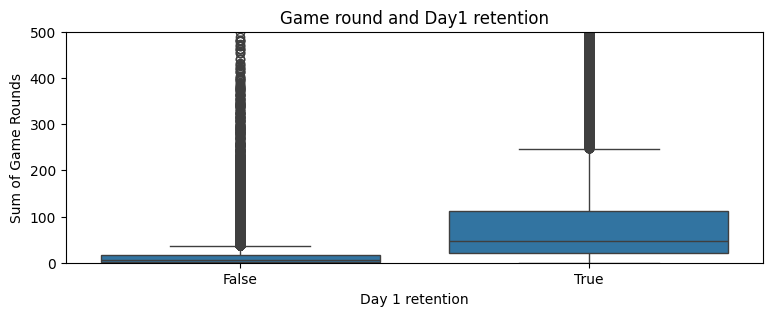

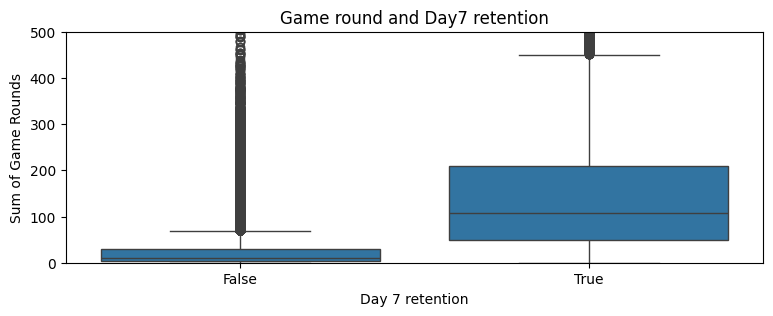

In [ ]:
# Vẽ biểu đồ hộp cho gate_30
plt.figure(figsize=(9, 3))
sns.boxplot(x='retention_1', y='sum_gamerounds', data=df)
plt.title('Game round and Day1 retention')
plt.xlabel('Day 1 retention')
plt.ylabel('Sum of Game Rounds')
plt.ylim(0, 500)
plt.show()

# Vẽ biểu đồ hộp cho gate_40
plt.figure(figsize=(9, 3))
sns.boxplot(x='retention_7', y='sum_gamerounds',data=df)
plt.title('Game round and Day7 retention')
plt.xlabel('Day 7 retention')
plt.ylabel('Sum of Game Rounds')
plt.ylim(0, 500)
plt.show()

Người chơi có tỷ lệ giữ chân thường sẽ chơi nhiều ván game hơn người không có tỷ lệ giữ chân ở cả ngày 1 và ngày 7

3.Xử lý outlier

In [ ]:
df_gate_40 = df[df['version'] == 'gate_40']
df_gate_30 = df[df['version'] == 'gate_30']

def outlier_thresholds(dataframe, variable):
    quartile3 = df[variable].quantile(0.25)
    quartile1 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile1 - quartile3
    upper_limit = quartile1 + interquantile_range*1.5
    lower_limit = quartile3 - interquantile_range*1.5
    return upper_limit, lower_limit

def replace_with_threshold(dataframe, variable):
    upper_limit, lower_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] > upper_limit), variable] = round(upper_limit)
    dataframe.loc[(dataframe[variable] < lower_limit), variable] = round(lower_limit)

replace_with_threshold(df_gate_40, "sum_gamerounds")
replace_with_threshold(df_gate_30, "sum_gamerounds")

df_without_outliers = pd.concat([df_gate_40, df_gate_30], ignore_index=True)

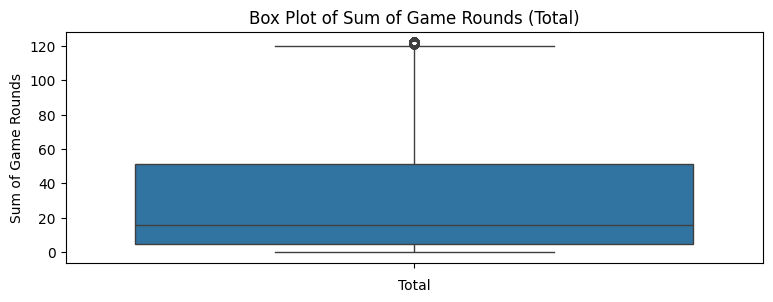

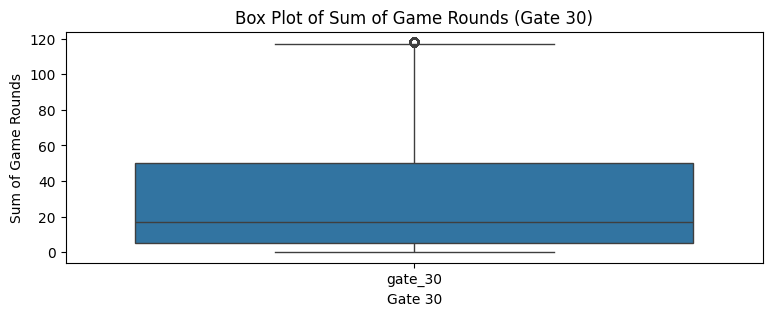

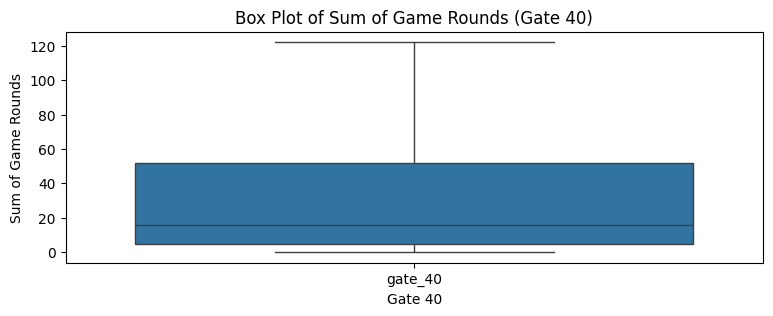

In [ ]:
# So sánh số lượng game rounds giữa các version
# Vẽ biểu đồ hộp cho tổng thể
plt.figure(figsize=(9, 3))
sns.boxplot(y='sum_gamerounds', data=df_without_outliers)
plt.title('Box Plot of Sum of Game Rounds (Total)')
plt.xlabel('Total')
plt.ylabel('Sum of Game Rounds')
plt.show()

# Vẽ biểu đồ hộp cho gate_30
plt.figure(figsize=(9, 3))
sns.boxplot(x='version', y='sum_gamerounds', data=df_without_outliers[df_without_outliers['version'] == 'gate_30'])
plt.title('Box Plot of Sum of Game Rounds (Gate 30)')
plt.xlabel('Gate 30')
plt.ylabel('Sum of Game Rounds')
plt.show()

# Vẽ biểu đồ hộp cho gate_40
plt.figure(figsize=(9, 3))
sns.boxplot(x='version', y='sum_gamerounds', data=df_without_outliers[df_without_outliers['version'] == 'gate_40'])
plt.title('Box Plot of Sum of Game Rounds (Gate 40)')
plt.xlabel('Gate 40')
plt.ylabel('Sum of Game Rounds')
plt.show()

4. A/B testing

Câu hỏi: Có sự khác biệt đáng kể nào về mặt thống kê về số lượng ván chơi giữa version gate_30 và gate_40 không?

In [ ]:
from scipy.stats import shapiro, levene, ttest_ind, mannwhitneyu
def ab_test(dataframe, group, control, test, target):
    # Kiểm tra tính chuẩn cho nhóm kiểm soát
    test_stat, pvalue_control = shapiro(dataframe.loc[dataframe[group] == control, target])
    # Kiểm tra tính chuẩn cho nhóm thử nghiệm
    test_stat, pvalue_test = shapiro(dataframe.loc[dataframe[group] == test, target])

    # Nếu p-value > 0.05, phân phối được coi là chuẩn
    normal_control = pvalue_control > 0.05
    normal_test = pvalue_test > 0.05

    if normal_control and normal_test:
        # Cả hai nhóm đều có phân phối chuẩn, kiểm tra tính đồng nhất của phương sai
        test_stat, pvalue_levene = levene(dataframe.loc[dataframe[group] == control, target],
                                  dataframe.loc[dataframe[group] == test, target])
        if pvalue_levene > 0.05:
            # Phương sai bằng nhau, sử dụng T-test chuẩn
            test_stat, pvalue = ttest_ind(dataframe.loc[dataframe[group] == control, target],
                                  dataframe.loc[dataframe[group] == test, target], equal_var=True)
        else:
            # Phương sai không bằng nhau, sử dụng Welch's T-test
            test_stat, pvalue = ttest_ind(dataframe.loc[dataframe[group] == control, target],
                                  dataframe.loc[dataframe[group] == test, target], equal_var=False)
            print("Variances are not equal, used Welch's t-test")
    else:
        # Kiểm định không tham số (Mann-Whitney U test)
        test_stat, pvalue = mannwhitneyu(dataframe.loc[dataframe[group] == control, target],
                                 dataframe.loc[dataframe[group] == test, target])

    # Diễn giải kết quả
    if pvalue > 0.05:
        print(f"There is no statistically significant difference in {target} between {control} and {test}")
    else:
        print(f"There is a statistically significant difference in {target} between {control} and {test}")
    print(f'Test Statistic = {test_stat:.4f}, p-value = {pvalue:.4f}')
# Gọi hàm ab_test với dữ liệu và các tham số phù hợp
ab_test(df_without_outliers, "version", "gate_30", "gate_40", "sum_gamerounds")


There is no statistically significant difference in sum_gamerounds between gate_30 and gate_40
Test Statistic = 1010596710.0000, p-value = 0.1195


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Câu hỏi: Có sự khác biệt về tỷ lệ chuyển đối ngày 1 giữa 2 versions k?

In [ ]:
ab_test(df_without_outliers, "version", "gate_30", "gate_40", "retention_1")


There is no statistically significant difference in retention_1 between gate_30 and gate_40
Test Statistic = 1022682813.0000, p-value = 0.0744


Câu hỏi: Có sự khác biệt về tỷ lệ chuyển đổi ngày 7 giữa 2 version k?

In [ ]:
ab_test(df_without_outliers, "version", "gate_30", "gate_40", "retention_7")

There is a statistically significant difference in retention_7 between gate_30 and gate_40
Test Statistic = 1025017239.0000, p-value = 0.0016


In [ ]:
# Tính trung bình cho gate_30
mean_retention_7_gate_30 = df_without_outliers[df_without_outliers['version'] == 'gate_30']['retention_7'].mean()
mean_retention_7_gate_40 = df_without_outliers[df_without_outliers['version'] == 'gate_40']['retention_7'].mean()

print(f"Mean Retention 7 for gate_30: {mean_retention_7_gate_30:.2f}")
print(f"Mean Retention 7 for gate_40: {mean_retention_7_gate_40:.2f}")

Mean Retention 7 for gate_30: 0.19
Mean Retention 7 for gate_40: 0.18


Kết luận:
- Số lượng ván chơi giữa 2 version không có gì khác biệt
- Về mặt ngắn hạn (1 ngày) thì tỷ lệ chuyển đổi của 2 version cũng không có gì khác biệt nhưng về mặt dài hạn (7 ngày) thì tỷ lệ chuyển đổi ở gate_30 sẽ cao hơn gate_40